In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BankChurners.csv")

# Display first few rows
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_12044\2490643510.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


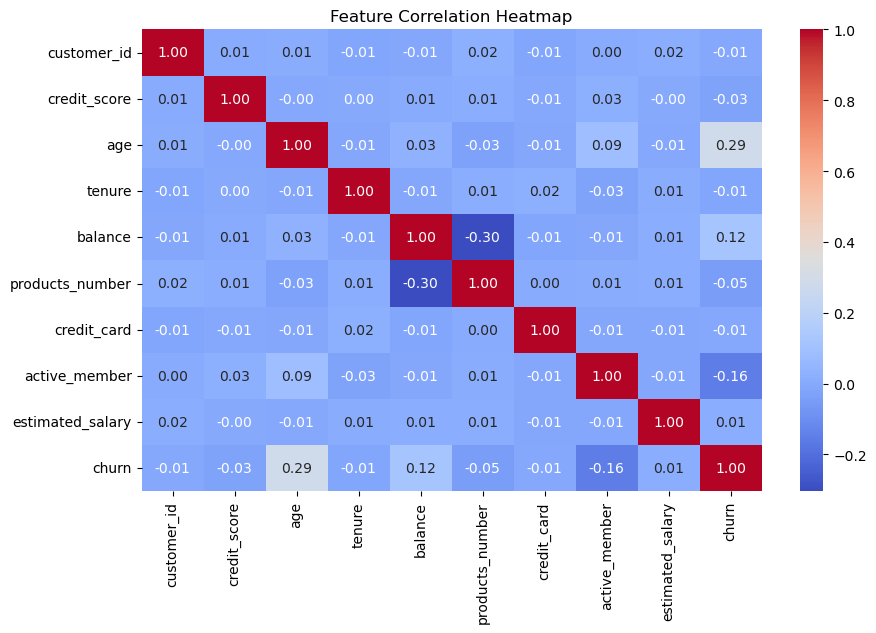

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Drop the unnecessary column
df.drop(columns=["customer_id"], inplace=True)


In [7]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)
# Preview the dataset after encoding
print(df.head())

   credit_score  age  tenure    balance  products_number  credit_card  \
0           619   42       2       0.00                1            1   
1           608   41       1   83807.86                1            0   
2           502   42       8  159660.80                3            1   
3           699   39       1       0.00                2            0   
4           850   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  country_Germany  country_Spain  \
0              1         101348.88      1                0              0   
1              1         112542.58      0                0              1   
2              0         113931.57      1                0              0   
3              0          93826.63      0                0              0   
4              1          79084.10      0                0              1   

   gender_Male  
0            0  
1            0  
2            0  
3            0  
4            

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# Target variable
X = df.drop('churn', axis=1)
y = df['churn']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [31]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build ANN model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dropout(0.3))
ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32").flatten()
y_prob_ann = ann.predict(X_test).flatten()

# Evaluation Metrics
ann_results = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann),
    'F1 Score': f1_score(y_test, y_pred_ann),
    'AUC-ROC': roc_auc_score(y_test, y_prob_ann)
}

ann_results


63/63 [==============================] - 0s 2ms/step


{'Accuracy': 0.8585,
 'Precision': 0.7477477477477478,
 'Recall': 0.4223918575063613,
 'F1 Score': 0.5398373983739837,
 'AUC-ROC': 0.8562459722176039}

In [36]:

from lightgbm import LGBMClassifier

# LightGBM with basic setup
lgbm = LGBMClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)
lgbm.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Evaluation Metrics
lgbm_results = {
    'Accuracy': accuracy_score(y_test, y_pred_lgbm),
    'Precision': precision_score(y_test, y_pred_lgbm),
    'Recall': recall_score(y_test, y_pred_lgbm),
    'F1 Score': f1_score(y_test, y_pred_lgbm),
    'AUC-ROC': roc_auc_score(y_test, y_prob_lgbm)
}

lgbm_results


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

{'Accuracy': 0.869,
 'Precision': 0.7673469387755102,
 'Recall': 0.47837150127226463,
 'F1 Score': 0.5893416927899686,
 'AUC-ROC': 0.8738201665423696}

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Create the model
rf = RandomForestClassifier(random_state=42)

# Randomized Search for Hyperparameter Tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of combinations to try
    cv=3,        # Cross-validation splits
    scoring='f1',
    n_jobs=-1,    # Use all available CPUs
    random_state=42
)

# Train the model
random_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
results = {
    'Best Parameters': best_params,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_prob)
}

# Show results
results



{'Best Parameters': {'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 30,
  'class_weight': 'balanced'},
 'Accuracy': 0.8535,
 'Precision': 0.6256281407035176,
 'Recall': 0.6335877862595419,
 'F1 Score': 0.629582806573957,
 'AUC-ROC': 0.8656292207596853}

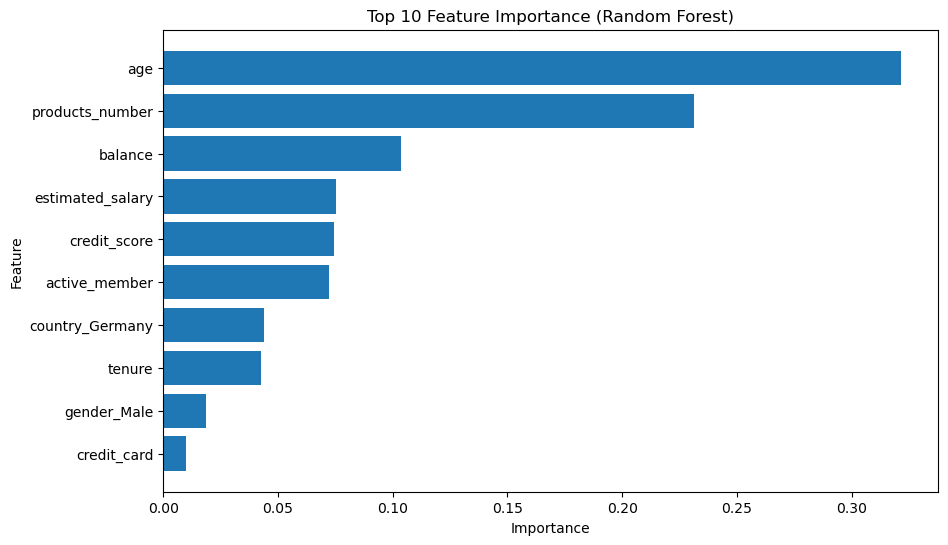

In [10]:

import numpy as np
# Train the best-tuned Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Get feature importance from Random Forest
importance = rf.feature_importances_
feature_names = X.columns

# Sort feature importance values
indices = np.argsort(importance)[::-1]
sorted_importance = importance[indices]
sorted_feature_names = feature_names[indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10][::-1], sorted_importance[:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()

In [16]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'model.pkl')


['model.pkl']